<a href="https://colab.research.google.com/github/AarshiMukherjee/Market-Interaction-Based-Company-Performance-Predictor/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this task, I have used Kaggle's NIFTY-50 STOCKS dataset (https://www.kaggle.com/datasets/iamsouravbanerjee/nifty50-stocks-dataset?resource=download).
This dataset contains **stock market data from the National Stock Exchange (NSE) of India** for different companies (each row is one company’s stock). It shows how each stock performed during a trading day and how it has **behaved over short-term and long-term periods.**

In [34]:
#Load the dataset in colab environment
import pandas as pd
import numpy as np
df=pd.read_csv("/content/National_Stock_Exchange_of_India_Ltd.csv")

In [35]:
#Structure of the dataset
df.head()

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,ADANIPORTS,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901,384.4,79.22,-4.65
1,ASIANPAINT,"3,101.00","3,167.35","3,091.00","3,138.00",-6.25,-0.20,10.29,322.53,"3,505.00","2,117.15",45.66,5.66
2,AXISBANK,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.9,568.4,10.19,-21.49
3,BAJAJ-AUTO,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,"4,361.40","3,041.00",9.30,-12.05
4,BAJAJFINSV,"17,200.00","17,237.20","16,610.00","16,684.00",-684.85,-3.94,3.42,576.79,"19,325.00","8,273.70",91.38,-9.10


In [36]:
#Dimension of Dataset
df.shape

(50, 13)

50 rows and 13 columns

In [37]:
#View column names
df.columns

Index(['Symbol', 'Open', 'High', 'Low', 'LTP', 'Chng', '% Chng',
       'Volume (lacs)', 'Turnover (crs.)', '52w H', '52w L', '365 d % chng',
       '30 d % chng'],
      dtype='object')

What each column means :

Symbol: Stock/company name

Open: Price when trading started

High / Low: Highest and lowest prices of the day

LTP (Last Traded Price): Most recent price

Chng / % Chng: Price change and percentage change from previous close

Volume (lacs): Number of shares traded in lakhs

Turnover (crs.): Total value of trading in crores

52w H / 52w L: Highest and lowest price in the last 1 year

365 d % chng: Performance over 1 year

30 d % chng: Performance over 1 month

There's no null values in the dataset hence no need to clean the dataset, we can directly generate summary statistics of all columns.

In [38]:
df.describe(include='all')

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
count,50,50,50,50,50,50.000000,50.000000,50.000000,50,50,50,50.000000,50.000000
unique,50,50,50,50,50,NaN,NaN,NaN,50,50,50,NaN,NaN
top,ADANIPORTS,750,766,713.25,715,NaN,NaN,NaN,532.63,901,384.4,NaN,NaN
freq,1,1,1,1,1,NaN,NaN,NaN,1,1,1,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,-70.133000,-2.930200,71.266600,NaN,NaN,NaN,41.203000,-5.996800
std,NaN,NaN,NaN,NaN,NaN,163.203678,2.677007,93.462062,NaN,NaN,NaN,37.358646,6.322546
min,NaN,NaN,NaN,NaN,NaN,-770.500000,-7.480000,0.300000,NaN,NaN,NaN,-16.020000,-22.080000
25%,NaN,NaN,NaN,NaN,NaN,-66.775000,-4.527500,13.472500,NaN,NaN,NaN,9.375000,-9.665000
50%,NaN,NaN,NaN,NaN,NaN,-29.975000,-3.300000,30.750000,NaN,NaN,NaN,35.860000,-5.705000
75%,NaN,NaN,NaN,NaN,NaN,-7.812500,-1.932500,99.200000,NaN,NaN,NaN,65.942500,-2.222500


Some columns don't have mean, median, std, and other statistical measures because they have been stored as 'strings' likely hence system is treating them as categorical variables. We need to identify categorical columns and convert to numerical for better analysis.

In [39]:
#Check datatypes of all columns and convert categorical columns to numerical
df.dtypes

,0
Symbol,object
Open,object
High,object
Low,object
LTP,object
Chng,float64
% Chng,float64
Volume (lacs),float64
Turnover (crs.),object
52w H,object


In [40]:
#Convert to numerical
numeric_cols = [
    'Open','High','Low','LTP','Chng','% Chng',
    'Volume (lacs)','Turnover (crs.)',
    '52w H','52w L','365 d % chng','30 d % chng'
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [41]:
#Check total number of null values in the dataset
df.isnull().sum()


,0
Symbol,0
Open,27
High,27
Low,27
LTP,27
Chng,0
% Chng,0
Volume (lacs),0
Turnover (crs.),8
52w H,29


In [42]:
#Mean Imputation to fill NaN values
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


In [43]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [44]:
df.isnull().sum()


,0
Symbol,0
Open,0
High,0
Low,0
LTP,0
Chng,0
% Chng,0
Volume (lacs),0
Turnover (crs.),0
52w H,0


In [45]:
#New summary statistics
df.describe()

,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,554.278261,561.332609,534.043478,539.915217,-70.133000,-2.930200,71.266600,393.141905,598.650000,439.690714,41.203000,-5.996800
std,182.939317,187.810702,176.680498,180.772096,163.203678,2.677007,93.462062,223.719833,188.523328,189.934008,37.358646,6.322546
min,125.600000,125.600000,120.500000,121.150000,-770.500000,-7.480000,0.300000,76.940000,141.500000,77.050000,-16.020000,-22.080000
25%,554.278261,561.332609,534.043478,539.915217,-66.775000,-4.527500,13.472500,195.897500,598.650000,391.837500,9.375000,-9.665000
50%,554.278261,561.332609,534.043478,539.915217,-29.975000,-3.300000,30.750000,393.141905,598.650000,439.690714,35.860000,-5.705000
75%,612.569565,616.133152,598.248370,600.953804,-7.812500,-1.932500,99.200000,562.795000,598.650000,462.877500,65.942500,-2.222500
max,951.000000,976.050000,898.000000,965.000000,158.400000,7.230000,517.880000,927.880000,979.000000,846.700000,167.950000,6.360000


Given below the plot helps understand overall market behavior by showing how stock price changes are distributed across companies.


*   2 bars near 0% mean many stocks had small gains or losses; the market was stable here.
*   9 Bars on the left side show stocks that lost value.
*   3 Bars on the right side show stocks that gained value; spread apart meaning the market was volatile here.
*   The smooth line shows the overall trend of these changes (left skewed).
*   More bars on the negative side meaning more stocks fell than rose.




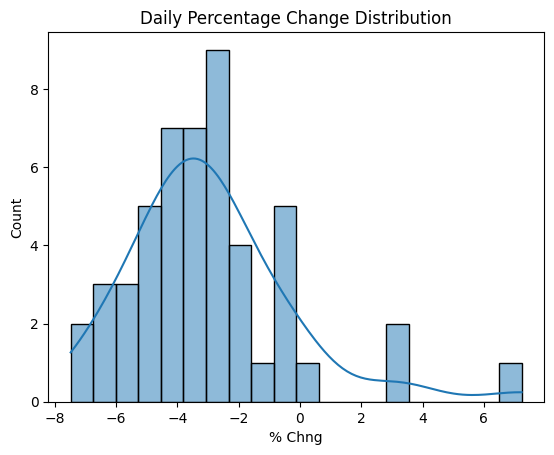

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.histplot(df['% Chng'], bins=20, kde=True)
plt.title('Daily Percentage Change Distribution')
plt.show()


Correlation Matrix given below shows how features are interdependent.

1. **Open, High, Low, LTP are all almost perfectly correlated**
If a stock opens at a high price, its lowest, highest, and closing prices are also high.This means an expensive stock remains expensive throughout the trading day.

2. **Price Levels vs 52-Week High & Low (Strong Positive Correlation)**
Stocks trading at higher prices today usually had higher prices over the past year. This shows that expensive stocks tend to stay expensive compared to others.
3. **Absolute Change vs Price Level (Negative Correlation)**
High-priced stocks usually show smaller absolute daily changes(more stable).Lower-priced stocks tend to move more and are more volatile.
4. **Volume vs Price (Negative Correlation)**
Lower-priced stocks are traded more frequently, resulting in higher trading volumes.Higher-priced stocks generally see lower participation, especially from retail traders.

5. **Volume vs Long-Term Performance (Positive Correlation)**
Stocks with strong performance over the past year tend to have higher trading volumes.Well-performing stocks attract more investor attention and activity.

6. **Short-Term vs Long-Term Performance (Weak Correlation)**
Strong short-term gains do not necessarily translate into long-term success.
Monthly price movements are often influenced by news and short-term market noise.


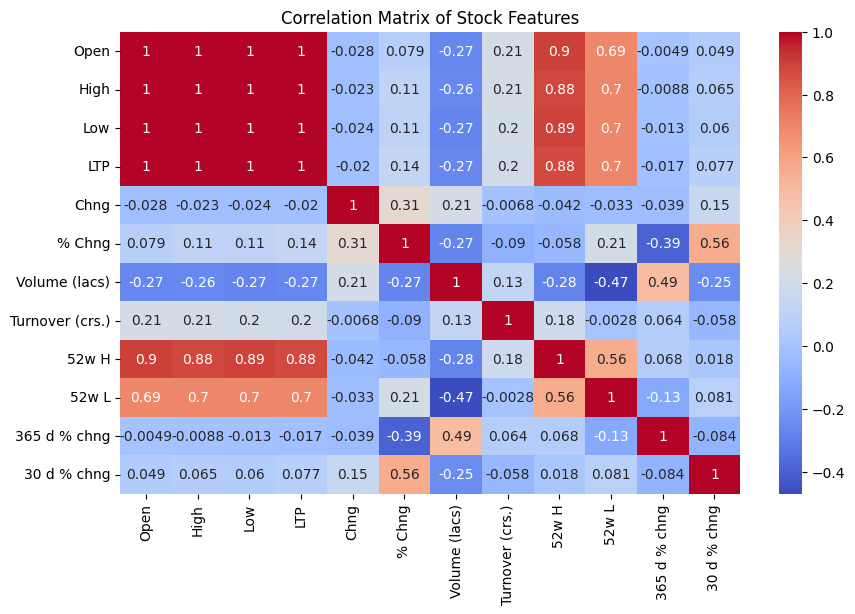

In [47]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Features')
plt.show()